In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os,glob,random
import matplotlib.pyplot as plt
import seaborn as sns

# Augmenting the dataset and adding the images into the directory(adding variations)

In [6]:
def walk_through_directory(dir_path):
    for dirpath,dirnames,filename in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filename)} images in {dirpath}")

In [7]:
walk_through_directory("Skin Diseases Classification/Training")



There are 4 directories and 0 images in Skin Diseases Classification/Training
There are 0 directories and 1177 images in Skin Diseases Classification/Training\Chickenpox
There are 0 directories and 1183 images in Skin Diseases Classification/Training\Measles
There are 0 directories and 1395 images in Skin Diseases Classification/Training\Monkeypox
There are 0 directories and 1224 images in Skin Diseases Classification/Training\Normal


Error in callback <function _draw_all_if_interactive at 0x000001A52EB93F40> (for post_execute):


KeyboardInterrupt: 

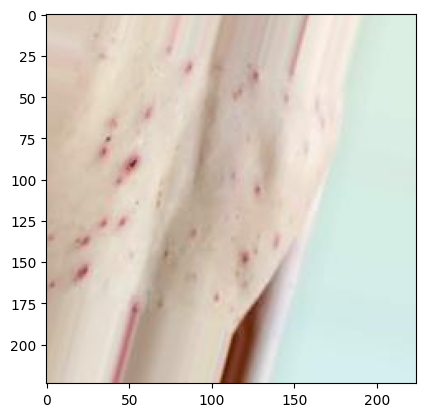

In [8]:
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from tensorflow.keras.utils import img_to_array

datagen=ImageDataGenerator(rotation_range=15,
                           width_shift_range=0.15,
                           height_shift_range=0.15,
                           horizontal_flip=True,
                           shear_range=0.1,
                           zoom_range=0.30,
                           fill_mode='nearest')

base_dir=r'Skin Diseases Classification\Testing\Chickenpox'
output_dir=r'Skin Diseases Classification\Validation\Chickenpox'

filenames=os.listdir(base_dir)

for filename in filenames:
    try:
        img=cv2.imread(os.path.join(base_dir,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32) / 255.0
        plt.imshow(img)
        x=img_to_array(img)
        x=x.reshape((1,)+x.shape)
        i=0
        for batch in datagen.flow(x,batch_size=1,save_to_dir=output_dir,save_prefix=filename.split('.')[0],save_format='jpg'):
            i+=1
            if i>=1:
                break
              
     
    except Exception as e:
        print(f"There was an error processing image: {e}")
        continue

In [9]:
walk_through_directory("Skin Diseases Classification/Training")
print("-------------------------------------------------------")
walk_through_directory("Skin Diseases Classification/Testing")

There are 4 directories and 0 images in Skin Diseases Classification/Training
There are 0 directories and 1177 images in Skin Diseases Classification/Training\Chickenpox
There are 0 directories and 1183 images in Skin Diseases Classification/Training\Measles
There are 0 directories and 1395 images in Skin Diseases Classification/Training\Monkeypox
There are 0 directories and 1224 images in Skin Diseases Classification/Training\Normal
-------------------------------------------------------
There are 4 directories and 0 images in Skin Diseases Classification/Testing
There are 0 directories and 168 images in Skin Diseases Classification/Testing\Chickenpox
There are 0 directories and 180 images in Skin Diseases Classification/Testing\Measles
There are 0 directories and 180 images in Skin Diseases Classification/Testing\Monkeypox
There are 0 directories and 168 images in Skin Diseases Classification/Testing\Normal


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
valid_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(r"Skin Diseases Classification/Training",
                                                 target_size=(224,224),
                                                 class_mode="categorical",
                                                 batch_size=64,
                                                 seed=123,
                                                 shuffle=True)
test_generator=test_datagen.flow_from_directory(r"Skin Diseases Classification/Testing",
                                               target_size=(224,224),
                                                 class_mode="categorical",
                                                 batch_size=64,
                                                 seed=123,
                                                 shuffle=True)
valid_generator=valid_datagen.flow_from_directory(r"Skin Diseases Classification/Validation",
                                                 target_size=(224,224),
                                                 class_mode="categorical",
                                                 batch_size=64,
                                                 seed=123,
                                                 shuffle=True)

Found 4979 images belonging to 4 classes.
Found 696 images belonging to 4 classes.
Found 708 images belonging to 4 classes.


In [43]:
print(len(train_generator))
print(len(test_generator))
print(len(valid_generator))

78
11
12


In [44]:
c=train_generator.class_indices
classes=list(c.keys())
classes

['Chickenpox', 'Measles', 'Monkeypox', 'Normal']

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
model=Sequential([
    Conv2D(16,(3,3),input_shape=(224,224,3),activation="relu"),
    Dense(16,activation="relu"),
    Conv2D(32,(3,3),activation="relu"),
    Dense(32,activation="relu"),
    MaxPooling2D(2,2),
    MaxPooling2D(3,3),
    MaxPooling2D(4,4),
    Dropout(0.15),
    Conv2D(64,(3,3),activation="relu"),
     Conv2D(128,(3,3),activation="relu"),
    Conv2D(256,(3,3),activation="relu"),
    Conv2D(512,(2,2),activation="relu"),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dense(128,activation="relu"),
    Dense(256,activation="relu"),
    Flatten(),
    Dense(4,activation="softmax")
])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 dense_16 (Dense)            (None, 222, 222, 16)      272       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 32)      4640      
                                                                 
 dense_17 (Dense)            (None, 220, 220, 32)      1056      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [13]:
train_data, train_labels = next(iter(train_generator))
valid_data, valid_labels = next(iter(valid_generator))
print('Train data shape:', train_data.shape)
print('Train labels shape:', train_labels.shape)
print('Validation data shape:', valid_data.shape)
print('Validation labels shape:', valid_labels.shape)

Train data shape: (64, 224, 224, 3)
Train labels shape: (64, 4)
Validation data shape: (64, 224, 224, 3)
Validation labels shape: (64, 4)


In [23]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
model.build((64,224,224,3))
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [24]:
early_callback=EarlyStopping(
patience=5,
monitor='val_loss',
    min_delta=0.001,
verbose=1,
mode="auto")

history=model.fit(train_generator,
                 steps_per_epoch=len(train_generator),
                 epochs=45,
                 validation_data=valid_generator,
                 callbacks=[early_callback])

Epoch 1/45
78/78 [==============================] - 280s 4s/step - loss: 1.3828 - accuracy: 0.2910 - val_loss: 1.3739 - val_accuracy: 0.2811
Epoch 2/45
78/78 [==============================] - 241s 3s/step - loss: 1.2559 - accuracy: 0.4139 - val_loss: 1.2620 - val_accuracy: 0.3715
Epoch 3/45
78/78 [==============================] - 247s 3s/step - loss: 1.1898 - accuracy: 0.4404 - val_loss: 1.2464 - val_accuracy: 0.4732
Epoch 4/45
78/78 [==============================] - 239s 3s/step - loss: 1.1337 - accuracy: 0.4872 - val_loss: 1.1934 - val_accuracy: 0.4647
Epoch 5/45
78/78 [==============================] - 267s 3s/step - loss: 1.0999 - accuracy: 0.5168 - val_loss: 1.1872 - val_accuracy: 0.4944
Epoch 6/45
78/78 [==============================] - 263s 3s/step - loss: 1.0327 - accuracy: 0.5521 - val_loss: 1.1094 - val_accuracy: 0.5325
Epoch 7/45
78/78 [==============================] - 280s 4s/step - loss: 0.9590 - accuracy: 0.5951 - val_loss: 0.9868 - val_accuracy: 0.5975
Epoch 8/45
78

In [25]:
loss,accuracy=model.evaluate(test_generator)
print(f"Loss: ",loss)
print(f"Test Accuracy: ",accuracy)

11/11 [==============================] - 6s 532ms/step - loss: 0.4710 - accuracy: 0.8477
Loss:  0.47096556425094604
Test Accuracy:  0.8477011322975159


In [26]:
model.save("Saved model files/h5 files/CNN-2-Skin Disease Classification.h5")

In [38]:
def plot_loss_curves(history):
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    
    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))

    plt.plot(epochs,loss,label='loss')
    plt.plot(epochs,val_loss,label='val_loss')
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss per epoch")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs,accuracy,label='accuracy')
    plt.plot(epochs,val_accuracy,label='val_accuracy')
    plt.title("Accuracy")
    plt.ylabel("Trend of accuracy")
    plt.xlabel("Epochs")
    plt.legend()

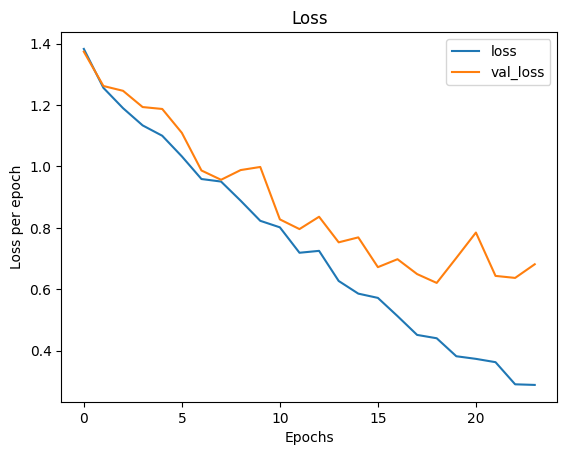

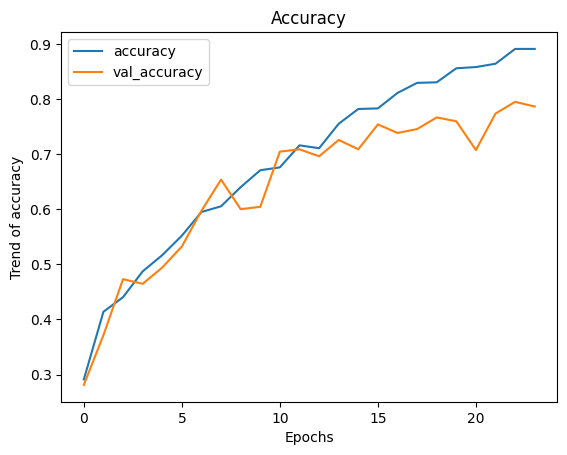

In [39]:
plot_loss_curves(history)

In [40]:
def load_and_prep_image(filename,img_shape=224,scale=True):
    img=tf.io.read_file(filename)
    img=tf.image.decode_jpeg(img)
    img=tf.image.resize(img,[img_shape,img_shape])
    if scale:
        return img/255.0
    else:
        return img

In [41]:
def pred_and_plot(model,filename,class_names):
    img=load_and_prep_image(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    pred_class=class_names[pred.argmax()]
    
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 42ms/step


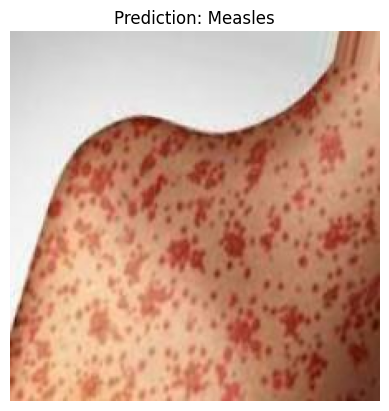

In [64]:
pred_and_plot(model,"Pred_samples/measles.jpg",classes)

In [59]:
import sklearn
from sklearn.metrics import confusion_matrix
y_pred=model.predict(test_generator)
y_pred_classes=np.argmax(y_pred,axis=1)

y_true=test_generator.classes

conf_matrix=confusion_matrix(y_true,y_pred_classes)
print(conf_matrix)

11/11 [==============================] - 6s 519ms/step
[[36 44 52 36]
 [57 44 34 45]
 [40 48 40 52]
 [43 51 43 31]]


11/11 [==============================] - 6s 513ms/step


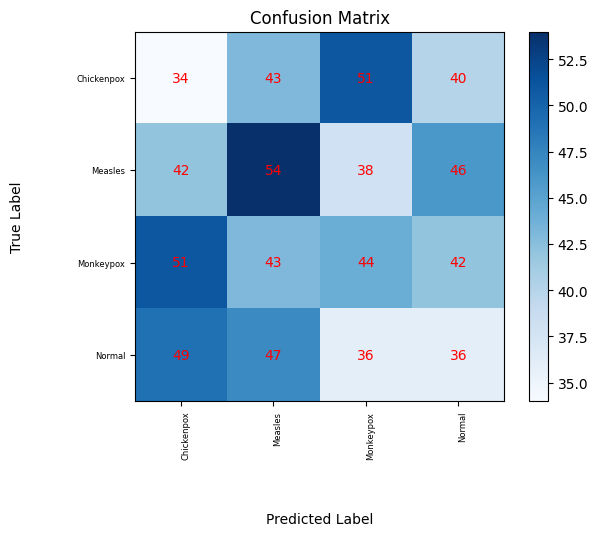

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = model.predict(test_generator)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels for the test data
y_true = test_generator.classes

# Build the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Define the class names
class_names = list(test_generator.class_indices.keys())

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set ticks and tick labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names,fontsize=6)
ax.set_yticklabels(class_names,fontsize=6)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red" if conf_matrix[i, j] > np.max(conf_matrix) / 2 else "black")

# Set title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label", labelpad=20)#,pad=20)
ax.set_ylabel("True Label", labelpad=20)#,pad=20)

# Adjust the position of the axis labels
ax.xaxis.set_label_coords(0.5, -0.30)
ax.yaxis.set_label_coords(-0.30, 0.5)

# Show the plot
plt.show()